### Import Library and Dataset

In [2]:
import pandas as pd
data = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/ecommerce_banner_promo.csv')
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2/11/2016 21:49,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,4/22/2016 2:07,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2/1/2016 17:24,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,3/24/2016 2:35,0


### Exploratory Data Analysis

In [13]:
print("Top & Bottom 5 Data")
print(data.head())

print("Dataset Information")
print(data.info())

print("Descriptive Statistics")
print(data.describe())
      
print("Data's Shape")
print(data.shape)

Top & Bottom 5 Data
   Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

         Timestamp  Clicked on Ad  
0   3/27/2016 0:53              0  
1    4/4/201

#### Finding Correlation

In [14]:
print(data.corr())

                          Daily Time Spent on Site       Age  Area Income  \
Daily Time Spent on Site                  1.000000 -0.331513     0.310954   
Age                                      -0.331513  1.000000    -0.182605   
Area Income                               0.310954 -0.182605     1.000000   
Daily Internet Usage                      0.518658 -0.367209     0.337496   
Male                                     -0.018951 -0.021044     0.001322   
Clicked on Ad                            -0.748117  0.492531    -0.476255   

                          Daily Internet Usage      Male  Clicked on Ad  
Daily Time Spent on Site              0.518658 -0.018951      -0.748117  
Age                                  -0.367209 -0.021044       0.492531  
Area Income                           0.337496  0.001322      -0.476255  
Daily Internet Usage                  1.000000  0.028012      -0.786539  
Male                                  0.028012  1.000000      -0.038027  
Clicked on Ad   

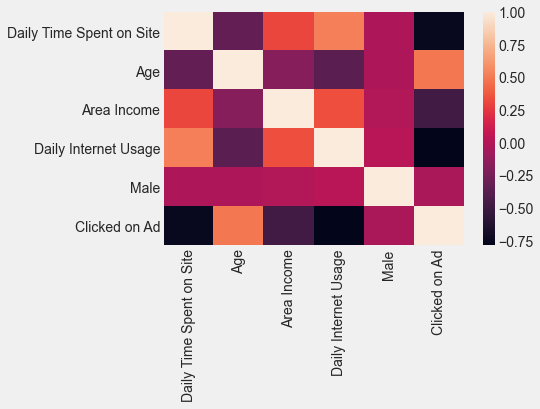

In [30]:
sns.heatmap(data.corr())

#### Checking labels distribution

In [15]:
print(data.groupby('Clicked on Ad').size())

Clicked on Ad
0    500
1    500
dtype: int64


#### EDA Visualization

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Matplotlib and Seaborn setup
sns.set_style('whitegrid')  
plt.style.use('fivethirtyeight')

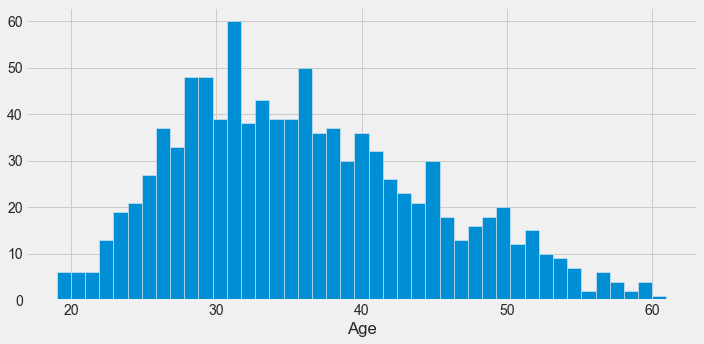

In [17]:
plt.figure(figsize=(10, 5))
plt.hist(data['Age'], bins = data.Age.nunique())
plt.xlabel('Age')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

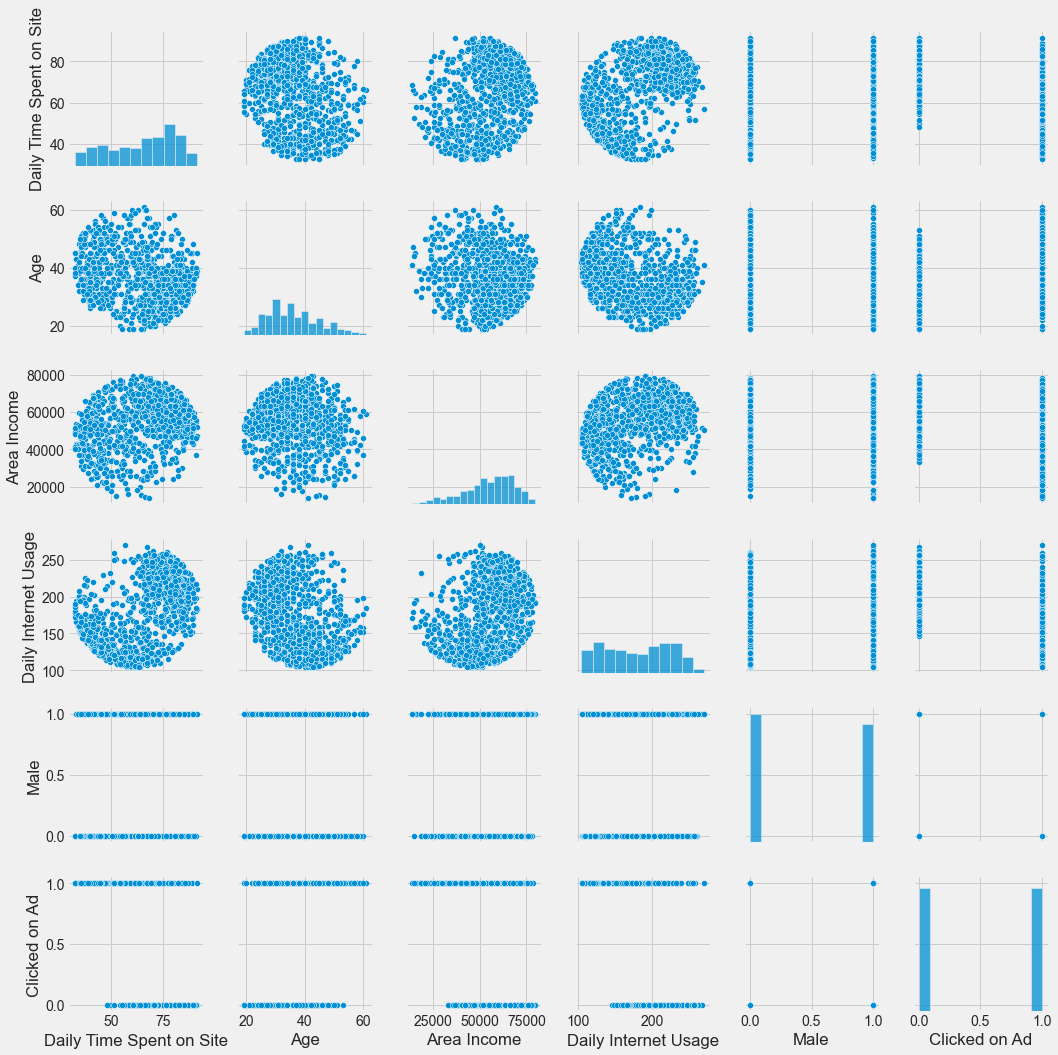

In [18]:
plt.figure()
sns.pairplot(data)
plt.show()

#### Checking Missing Value

In [19]:
print(data.isnull().sum().sum())

0


### Splitting the Data

In [21]:
from sklearn.model_selection import train_test_split

X = data.drop(['Ad Topic Line','City','Country','Timestamp','Clicked on Ad'], axis = 1)
y = data['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Make the model using Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg = logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

### Evaluation

In [25]:
print("Evaluasi Model Performance:")
print("Training Accuracy :", logreg.score(X_train, y_train))
print("Testing Accuracy :", logreg.score(X_test, y_test))

Evaluasi Model Performance:
Training Accuracy : 0.9
Testing Accuracy : 0.9


In [26]:
from sklearn.metrics import confusion_matrix, classification_report

# Apply classification_report function to y_test and y_pred
print("Classification report:")
cr = classification_report(y_test, y_pred)
print(cr)

Classification report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.89        89
           1       0.96      0.86      0.90       111

    accuracy                           0.90       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.90      0.90       200



In [27]:
# Apply confusion_matrix function to y_test and y_pred
print("Confusion matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

Confusion matrix:
[[85  4]
 [16 95]]


### Confusion Matrix Visualization

In [28]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_pred)))

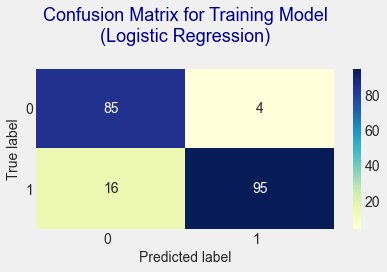

In [29]:
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()